In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***data being the input data ***
**result is the ouput of the input data**

In [55]:
data = pd.read_csv('/content/drive/MyDrive/Copy of Input_Data.csv')
result = pd.read_csv('/content/drive/MyDrive/Copy of OutPut Default_Flag .csv')

\**TASK 1**

In [56]:
data.isna().sum()

ID      0
B_37    0
S_24    0
S_4     0
S_14    0
       ..
D_52    0
D_29    0
R_1     0
R_28    0
S_5     0
Length: 189, dtype: int64

In [57]:
num_rows = len(data)

# Print the number of rows
print(num_rows)

458913


In [58]:
data.isnull().sum().sum()

13005991

In [59]:
null_columns = data.columns[data.isnull().any()]

# Count the number of null values in each column
null_counts = data[null_columns].isnull().sum()

# Print the column names and their corresponding null value counts
for column in null_columns:
    print(f"{column}: {null_counts[column]}")

D_38: 458086
P_2: 2969
S_7: 84970
S_25: 84970
D_99: 30377
B_42: 31
B_17: 31
B_31: 31
B_33: 31
B_3: 31
B_12: 31
D_121: 31
D_107: 31
D_79: 31
B_21: 1563
B_29: 244471
B_26: 431589
B_5: 31
B_9: 31
B_10: 31
B_18: 31
B_40: 40
B_14: 4091
D_68: 325932
D_89: 134322
D_8: 95123
P_1: 22220
D_110: 409597
D_74: 1240
D_17: 458268
S_23: 183858
D_106: 244734
D_19: 9012
D_88: 6365
D_48: 406331
D_34: 6365
D_44: 10037
D_98: 1216
D_92: 262235
D_59: 1190
R_8: 431960
D_126: 1240
B_8: 612
B_6: 612
D_90: 4086
D_73: 454674
D_105: 407150
D_67: 2795
D_10: 343295
D_40: 57992
D_64: 58953
D_133: 213837
D_50: 1701
D_69: 1701
D_65: 4196
D_22: 48348
D_6: 22295
D_56: 22295
D_100: 1240
D_141: 399003
B_13: 31
S_16: 44
S_8: 1421
S_11: 1734
S_26: 1767
D_87: 2830
D_51: 2830
D_123: 2830
D_84: 2830
D_18: 2830
D_23: 2830
D_55: 2830
D_108: 2830
D_7: 2830
D_135: 2830
D_11: 407265
D_139: 2830
D_142: 378598
D_31: 245602
D_95: 407153
D_93: 31
B_7: 454808
S_19: 117166
B_22: 452771
D_54: 6017
D_20: 6017
D_102: 6017
D_91: 6017
D_32: 60

In [60]:
for column in null_columns:
    print(f"{column}: {null_counts[column]*100/num_rows}")

D_38: 99.81979155090399
P_2: 0.6469635856905339
S_7: 18.51549204315415
S_25: 18.51549204315415
D_99: 6.619337434328511
B_42: 0.006755093013272668
B_17: 0.006755093013272668
B_31: 0.006755093013272668
B_33: 0.006755093013272668
B_3: 0.006755093013272668
B_12: 0.006755093013272668
D_121: 0.006755093013272668
D_107: 0.006755093013272668
D_79: 0.006755093013272668
B_21: 0.34058743160468324
B_29: 53.271753033799435
B_26: 94.04593027436573
B_5: 0.006755093013272668
B_9: 0.006755093013272668
B_10: 0.006755093013272668
B_18: 0.006755093013272668
B_40: 0.008716249049384088
B_14: 0.8914543715257576
D_68: 71.02261212909636
D_89: 29.269600120284238
D_8: 20.727893958114066
P_1: 4.841876346932861
D_110: 89.25373654701436
D_74: 0.27020372053090674
D_17: 99.85945048407868
S_23: 40.063802943041495
D_106: 53.32906237129914
D_19: 1.9637709108262351
D_88: 1.386973129983243
D_48: 88.54205481213215
D_34: 1.386973129983243
D_44: 2.1871247927167023
D_98: 0.2649739711012763
D_92: 57.142639236630906
D_59: 0.259

**TO CHECK IF THEIR ARE ANY NaN VALUES IN result **

In [61]:
result['Default_Flag'].isna().sum()

0

**deleting those columns which have a big percentage of NaN Values**

In [62]:
# List the columns you want to delete
columns_to_delete = []

for column in null_columns:
    if null_counts[column]*100/num_rows > 40:
      columns_to_delete.append(column)
      #data = data.drop(columns=column)
# Delete the specified columns
data = data.drop(columns=columns_to_delete)


In [63]:
data = data.fillna(data.mean())

<ipython-input-63-369509bb1069>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [64]:
data.isna().sum().sum()
#data = data.drop('D_44')

10037

In [65]:
# Count the number of null values in each column
data['D_44'].fillna(data['D_44'].mode())
#null_counts = data[null_columns].isnull().sum()

# Print the column names and their corresponding null value counts
for column in null_columns:
    print(f"{column}: {null_counts[column]}")
data['D_36'].isnull().sum()
data[data.columns[data.isnull().any()]].isnull().sum()


D_38: 458086
P_2: 2969
S_7: 84970
S_25: 84970
D_99: 30377
B_42: 31
B_17: 31
B_31: 31
B_33: 31
B_3: 31
B_12: 31
D_121: 31
D_107: 31
D_79: 31
B_21: 1563
B_29: 244471
B_26: 431589
B_5: 31
B_9: 31
B_10: 31
B_18: 31
B_40: 40
B_14: 4091
D_68: 325932
D_89: 134322
D_8: 95123
P_1: 22220
D_110: 409597
D_74: 1240
D_17: 458268
S_23: 183858
D_106: 244734
D_19: 9012
D_88: 6365
D_48: 406331
D_34: 6365
D_44: 10037
D_98: 1216
D_92: 262235
D_59: 1190
R_8: 431960
D_126: 1240
B_8: 612
B_6: 612
D_90: 4086
D_73: 454674
D_105: 407150
D_67: 2795
D_10: 343295
D_40: 57992
D_64: 58953
D_133: 213837
D_50: 1701
D_69: 1701
D_65: 4196
D_22: 48348
D_6: 22295
D_56: 22295
D_100: 1240
D_141: 399003
B_13: 31
S_16: 44
S_8: 1421
S_11: 1734
S_26: 1767
D_87: 2830
D_51: 2830
D_123: 2830
D_84: 2830
D_18: 2830
D_23: 2830
D_55: 2830
D_108: 2830
D_7: 2830
D_135: 2830
D_11: 407265
D_139: 2830
D_142: 378598
D_31: 245602
D_95: 407153
D_93: 31
B_7: 454808
S_19: 117166
B_22: 452771
D_54: 6017
D_20: 6017
D_102: 6017
D_91: 6017
D_32: 60

D_44    10037
dtype: int64

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = data.select_dtypes(exclude='object').columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [67]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_columns = data.select_dtypes(include='object').columns

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Encode categorical variables
encoded_data = encoder.fit_transform(data[categorical_columns])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the original dataset
data_encoded = pd.concat([data, encoded_df], axis=1)

# Drop the original categorical columns from the dataset
data_encoded.drop(columns=categorical_columns, inplace=True)

# Print the encoded dataset
print(data_encoded)
print(data[categorical_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


              ID      B_37      S_24       S_4      S_14      B_25      B_30  \
0      -0.829610 -0.154144  1.032096  1.766755  1.021051  1.154705 -0.614872   
1       0.921620 -0.146065  0.427630  1.455740  1.448219 -1.531629 -0.390970   
2       1.684469 -0.160785  0.062910  1.482994  0.123191  1.152087 -0.666450   
3       1.307580 -0.168769 -1.670984  0.158775 -0.801315 -0.105839 -0.677705   
4      -1.341744 -0.176105 -0.714989  1.452533  0.595494  1.149469 -0.658366   
...          ...       ...       ...       ...       ...       ...       ...   
458908  0.135380 -0.169823  0.013176 -0.484096  0.573733  0.332668 -0.488889   
458909  1.299490 -0.155487  0.886718 -1.023025 -0.793621  1.157323 -0.680180   
458910  1.027378 -0.163374 -0.610419 -0.485299  0.138505  0.208315 -0.661544   
458911 -1.644029 -0.180000  0.134324  0.049759 -0.806220  0.313033 -0.679415   
458912 -1.218630 -0.137698  1.585552 -1.032480 -0.800484  1.149469 -0.661023   

           D_138       P_2           S_

In [68]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_column = label_encoder.fit_transform(data['D_36'])

# Replace the original categorical column with the encoded column
data['D_36'] = encoded_column

encoded_column = label_encoder.fit_transform(data['D_44'])

# Replace the original categorical column with the encoded column
data['D_44'] = encoded_column

print(data['D_36'])

0         1
1         0
2         1
3         2
4         4
         ..
458908    1
458909    1
458910    2
458911    1
458912    1
Name: D_36, Length: 458913, dtype: int64


In [69]:
data.isnull().sum().sum()

0

In [70]:
result.isnull().sum().sum()

0

In [71]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, result, test_size=0.2, random_state=1234)

In [72]:
  X_train.isnull().sum().sum()
  X_test.isnull().sum().sum()

0

In [73]:
print(X_train)

              ID      B_37      S_24       S_4      S_14      B_25      B_30  \
435210  0.884843  6.126770  0.418703 -1.005653 -0.783685 -0.992671  0.956513   
334867  1.586219 -0.184220  1.187676  0.033728 -0.811642 -0.992343  0.923975   
185116  1.593844 -0.180048  0.075663  1.444518  0.603554  1.167794 -0.165237   
295524 -1.068609 -0.143068 -1.647691  0.489028 -0.812608 -1.166437  1.437263   
377341  1.485250 -0.134725  1.503936 -1.008358 -0.795283  1.146851 -0.660667   
...          ...       ...       ...       ...       ...       ...       ...   
220532 -0.149536 -0.173156 -0.179386  0.557964  0.603554 -0.116311 -0.675932   
453836  1.318208  6.089945 -0.843151 -1.027684 -0.799766 -0.993652  1.154181   
384053  0.284364 -0.170519 -0.743044 -1.022975 -0.809331 -0.877808  1.347783   
165158 -1.217155 -0.141582 -1.082897  0.553155  0.602748  0.327432  0.477390   
451283 -1.193201 -0.174295  0.011900  1.766755  0.583405  1.149469 -0.565862   

           D_138       P_2           S_

In [74]:
X_train.isnull().sum()

ID      0
B_37    0
S_24    0
S_4     0
S_14    0
       ..
D_52    0
D_29    0
R_1     0
R_28    0
S_5     0
Length: 158, dtype: int64

In [75]:
print(y_train)

        Default_Flag
435210             3
334867             0
185116             0
295524             2
377341             0
...              ...
220532             0
453836             0
384053             2
165158             0
451283             0

[367130 rows x 1 columns]


# ***TASK 2 : FEATURE ENGINEERING***

In [76]:
from sklearn.feature_selection import f_classif
# Perform ANOVA F-test
numerical_columns = X_train.select_dtypes(exclude='object').columns #removing those columnsm which have any type of string values
numerical_columns = numerical_columns.drop('ID','B_37')
f_scores, p_values = f_classif(X_train[numerical_columns] , y_train)

# Create a DataFrame to store feature scores and p-values
results_df = pd.DataFrame({'Feature': numerical_columns, 'F-Score': f_scores, 'p-value': p_values})

# Set a threshold for F-Score and p-value
f_score_threshold = results_df['F-Score'].quantile(0.80)  # Example: Top 20% of F-Scores
p_value_threshold = 0.05  # Example: Significance level of 0.05

# Filter features based on F-Score and p-value thresholds
selected_features = results_df[(results_df['F-Score'] >= f_score_threshold) & (results_df['p-value'] <= p_value_threshold)]

# Print the selected features
print("Selected Features:")
print(selected_features)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selected Features:
    Feature        F-Score  p-value
4      B_25   52333.306460      0.0
5      B_30   51857.072942      0.0
7       P_2  102691.865854      0.0
11     D_99   48057.248433      0.0
15     B_42   24481.624961      0.0
16     B_17   31631.476048      0.0
20      B_3   32850.046461      0.0
21     B_19   33623.826271      0.0
22     B_12   22386.609947      0.0
23    D_121   43821.891317      0.0
25     D_79   29048.644043      0.0
27     D_60   52667.559157      0.0
28      B_5   45880.204409      0.0
29      B_9   55829.005726      0.0
30     B_10   42411.186741      0.0
31     B_18   34618.685012      0.0
35     B_32   41853.687916      0.0
36      D_2   40901.951801      0.0
39     R_24   46559.470145      0.0
49     B_20   27553.585538      0.0
50     B_35   40395.773993      0.0
86     R_13   50578.777761      0.0
87     R_19   30135.173967      0.0
88     B_36   31244.941291      0.0
89     D_40   66458.473109      0.0
92     D_50   32955.915257      0.0
96    D_1

In [77]:
# print(selected_features['Feature'])
final = list(selected_features['Feature'])
print(final)

['B_25', 'B_30', 'P_2', 'D_99', 'B_42', 'B_17', 'B_3', 'B_19', 'B_12', 'D_121', 'D_79', 'D_60', 'B_5', 'B_9', 'B_10', 'B_18', 'B_32', 'D_2', 'R_24', 'B_20', 'B_35', 'R_13', 'R_19', 'B_36', 'D_40', 'D_50', 'D_129', 'D_22', 'D_56', 'B_13', 'D_93', 'B_11']


In [78]:
X_train.isnull().sum().sum()

0

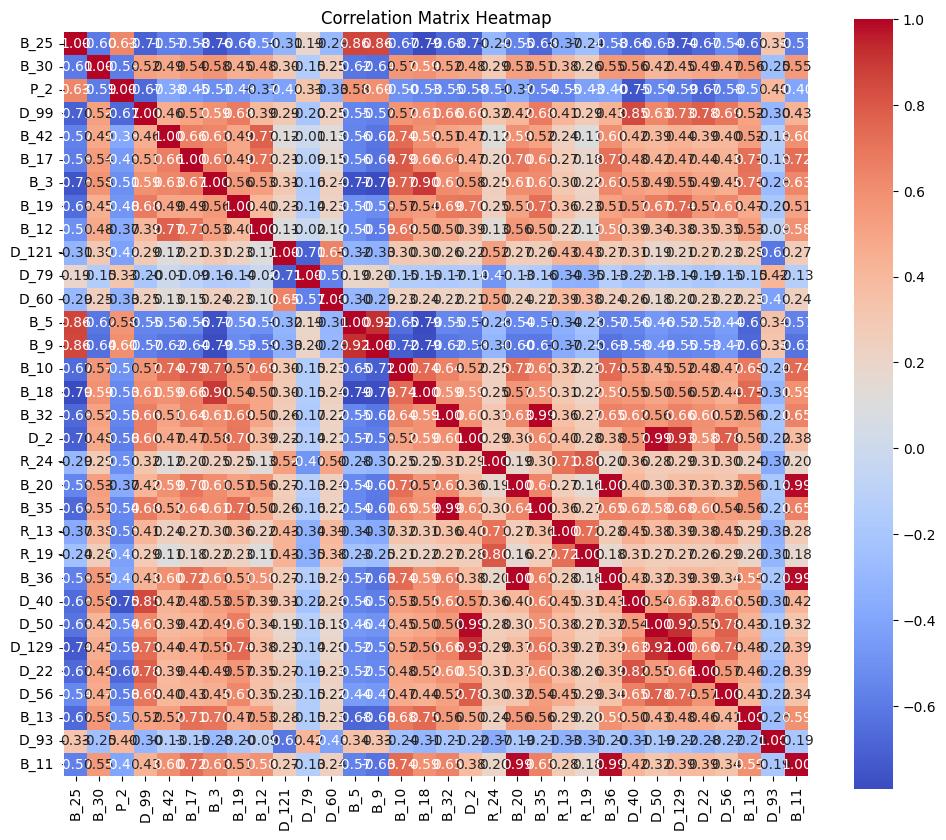

In [79]:
from sklearn.preprocessing import StandardScaler
# Calculate correlation matrix
# Apply feature scaling

# scaler = StandardScaler()
# X_test_scaled = scaler.fit_transform(X_test[selected_features])
corr_matrix = X_train[selected_features['Feature']].corr()


# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [80]:
train_dict =  {}
test_dict = {}
for i in final:
  train_dict[i]=list(X_train[i])
  test_dict[i]=list(X_test[i])

X_train = pd.DataFrame(train_dict)
X_test = pd.DataFrame(test_dict)

X_train

,B_25,B_30,P_2,D_99,B_42,B_17,B_3,B_19,B_12,D_121,...,R_19,B_36,D_40,D_50,D_129,D_22,D_56,B_13,D_93,B_11
0,-0.992671,0.956513,-0.466879,-0.453907,1.656444,1.362219,1.923134,0.499854,2.030567,-0.326696,...,-0.216535,0.146256,-0.592908,1.750540,1.717031,-0.733925,-0.550684,1.318880,0.498177,0.157151
1,-0.992343,0.923975,-0.712228,1.043027,1.681592,2.080885,1.920609,0.237514,2.030567,-0.326582,...,-0.212740,2.646079,0.613543,-0.391995,-0.213794,0.464529,-0.545922,2.524073,0.507961,2.651020
2,1.167794,-0.165237,1.133385,-1.023087,-0.465977,-0.526817,-0.662210,-0.591497,-0.431758,-0.315700,...,-0.208771,-0.237743,-1.202790,-0.704116,-0.831728,-1.213971,-0.560154,-0.488909,0.503069,-0.255331
3,-1.166437,1.437263,-1.028986,1.816506,3.825427,2.769004,1.925659,1.968352,2.030567,-0.324852,...,-0.221183,4.200023,1.229701,0.536156,0.730025,1.311087,0.491357,1.921477,0.500623,4.211336
4,1.146851,-0.660667,0.902683,-0.777591,-0.477126,-0.527948,-0.666896,-0.596318,-0.431758,-0.306435,...,-0.223011,-0.581199,-0.891289,-0.707939,-0.840303,-0.960990,-0.542472,-1.091505,0.507961,-0.573785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367125,-0.116311,-0.675932,-0.384486,1.414633,-0.460901,-0.528676,-0.655088,0.333418,-0.431758,-0.313925,...,-0.209607,-0.492621,1.176453,-0.070509,0.536582,0.602274,0.477179,-0.488909,0.495731,-0.450106
367126,-0.993652,1.154181,-0.133643,-0.672499,1.656444,0.904813,1.918084,-0.440410,2.030567,2.401179,...,-0.221200,-0.025818,-0.373830,-0.059986,0.331443,-0.364094,-0.562939,2.524073,-2.013974,-0.009950
367127,-0.877808,1.347783,-1.491304,1.016123,1.687879,0.394351,0.087978,-0.539105,2.030567,-0.301229,...,-0.216430,-0.137719,1.632866,-0.394626,-0.310966,1.405787,0.489331,1.318880,0.500623,-0.132772
367128,0.327432,0.477390,-1.072929,1.498707,-0.491353,-0.289950,-0.663029,-0.596318,-0.431758,-0.311240,...,-0.218067,0.348944,0.843271,-0.394626,-0.447050,-0.399248,-0.026618,0.113688,0.512853,0.354827


In [81]:
X_train.isnull().sum()


B_25     0
B_30     0
P_2      0
D_99     0
B_42     0
B_17     0
B_3      0
B_19     0
B_12     0
D_121    0
D_79     0
D_60     0
B_5      0
B_9      0
B_10     0
B_18     0
B_32     0
D_2      0
R_24     0
B_20     0
B_35     0
R_13     0
R_19     0
B_36     0
D_40     0
D_50     0
D_129    0
D_22     0
D_56     0
B_13     0
D_93     0
B_11     0
dtype: int64

**TRAINING USING LOGISTIC REGRESSION**



In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=100)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.87      0.97      0.92     67841
           1       0.70      0.54      0.61      6968
           2       0.40      0.44      0.42      9330
           3       0.31      0.04      0.06      7644

    accuracy                           0.80     91783
   macro avg       0.57      0.50      0.50     91783
weighted avg       0.76      0.80      0.77     91783



**accuracy for logistic regression = 81%**

In [83]:
from sklearn.tree import DecisionTreeClassifier


# Create a Decision Tree classifier
tree = DecisionTreeClassifier()

# Train the model
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.88      0.89     67841
           1       0.49      0.49      0.49      6968
           2       0.30      0.30      0.30      9330
           3       0.21      0.22      0.22      7644

    accuracy                           0.74     91783
   macro avg       0.47      0.48      0.47     91783
weighted avg       0.74      0.74      0.74     91783



In [84]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
forest = RandomForestClassifier()

# Train the model
forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = forest.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

<ipython-input-84-1c8b4fccda27>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.87      0.97      0.92     67841
           1       0.71      0.55      0.62      6968
           2       0.41      0.42      0.41      9330
           3       0.31      0.06      0.11      7644

    accuracy                           0.80     91783
   macro avg       0.57      0.50      0.51     91783
weighted avg       0.77      0.80      0.78     91783



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
boosting = GradientBoostingClassifier()

# Train the model
boosting.fit(X_train, y_train)

# Make predictions on the test set
y_pred = boosting.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.88      0.96      0.92     67841
           1       0.72      0.55      0.62      6968
           2       0.40      0.48      0.44      9330
           3       0.34      0.02      0.05      7644

    accuracy                           0.81     91783
   macro avg       0.58      0.50      0.51     91783
weighted avg       0.77      0.81      0.77     91783



In [ ]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     67841
           1       0.71      0.55      0.62      6968
           2       0.41      0.47      0.43      9330
           3       0.29      0.05      0.09      7644

    accuracy                           0.81     91783
   macro avg       0.57      0.51      0.52     91783
weighted avg       0.77      0.81      0.78     91783

